In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error

# Set up code checking
from learntools.core import binder
binder.bind(globals())
from learntools.machine_learning.ex3 import *

/kaggle/input/gene-expression/data_set_ALL_AML_independent.csv
/kaggle/input/gene-expression/data_set_ALL_AML_train.csv
/kaggle/input/gene-expression/actual.csv


# Read and prepare data

In [2]:
#Reading the data
file_path = '../input/gene-expression/data_set_ALL_AML_train.csv'
missing_value_formats = ["n.a.","?","NA","n/a", "na", "--"]

train_dataset = pd.read_csv(file_path, na_values = missing_value_formats)

In [3]:
train_dataset.describe()
print("The dataset has", train_dataset.shape[0], "rows and", train_dataset.shape[1], 'columns.')

The dataset has 7129 rows and 78 columns.


In [4]:
#No need of Gene Description and Accession Number, they are useless 
train_dataset = train_dataset.drop('Gene Description', axis=1)
train_dataset = train_dataset.drop('Gene Accession Number', axis=1)

In [5]:
cols = [col for col in train_dataset.columns if "call" not in col]
train_dataset = train_dataset[cols]

In [6]:
file_path = '../input/gene-expression/actual.csv'

patients_info = pd.read_csv(file_path, na_values = missing_value_formats)
patients_info["cancer"] = patients_info["cancer"].astype('category')
patients_info["cancer_category"] = patients_info["cancer"].cat.codes
print(patients_info)

    patient cancer  cancer_category
0         1    ALL                0
1         2    ALL                0
2         3    ALL                0
3         4    ALL                0
4         5    ALL                0
..      ...    ...              ...
67       68    ALL                0
68       69    ALL                0
69       70    ALL                0
70       71    ALL                0
71       72    ALL                0

[72 rows x 3 columns]


In [7]:
print(patients_info.columns)
cancer_forms = patients_info.groupby(['cancer','cancer_category']).size().reset_index().rename(columns={0:'counter'})
cancer_forms = cancer_forms[cancer_forms["counter"] > 0]
print(cancer_forms)

Index(['patient', 'cancer', 'cancer_category'], dtype='object')
  cancer  cancer_category  counter
0    ALL                0       47
3    AML                1       25


In [8]:
train_dataset['cancer_type'] = patients_info[:38]['cancer_category']

train_dataset.describe()

,1,2,3,4,5,6,7,8,9,10,...,36,37,38,28,29,30,31,32,33,cancer_type
count,7129.000000,7129.000000,7129.000000,7129.000000,7129.000000,7129.000000,7129.000000,7129.000000,7129.000000,7129.000000,...,7129.000000,7129.000000,7129.000000,7129.000000,7129.000000,7129.000000,7129.000000,7129.000000,7129.000000,38.000000
mean,641.367092,690.246318,698.307897,600.985271,679.532894,564.797728,584.437649,571.359097,789.713705,599.483097,...,775.143498,689.248141,626.885959,673.279422,556.463179,718.934493,598.648899,676.920887,723.563473,0.289474
std,2264.294361,2468.814372,2485.656277,2340.047428,2375.895416,2494.604090,2412.812263,2378.780450,2580.157021,2421.156219,...,2676.664777,2543.537830,2473.180838,2413.149603,2376.681824,2533.678058,2405.268550,2436.964933,2507.382019,0.459606
min,-19826.000000,-17930.000000,-27182.000000,-23396.000000,-10339.000000,-21658.000000,-24024.000000,-27570.000000,-25171.000000,-12500.000000,...,-27398.000000,-23673.000000,-23645.000000,-20376.000000,-9501.000000,-17580.000000,-25491.000000,-28400.000000,-27811.000000,0.000000
25%,-21.000000,-14.000000,-31.000000,-33.000000,8.000000,-26.000000,-33.000000,-58.000000,-14.000000,-15.000000,...,-27.000000,-23.000000,-22.000000,-16.000000,-13.000000,-25.000000,-32.000000,-22.000000,-38.000000,0.000000
50%,159.000000,130.000000,177.000000,139.000000,146.000000,106.000000,134.000000,140.000000,166.000000,103.000000,...,144.000000,134.000000,133.000000,150.000000,82.000000,128.000000,107.000000,155.000000,170.000000,0.000000
75%,535.000000,488.000000,610.000000,497.000000,471.000000,401.000000,497.000000,527.000000,609.000000,386.000000,...,569.000000,505.000000,490.000000,517.000000,309.000000,488.000000,443.000000,549.000000,649.000000,1.000000
max,31086.000000,29288.000000,28056.000000,31449.000000,29543.000000,38467.000000,41911.000000,40065.000000,23602.000000,28033.000000,...,37164.000000,32204.000000,29169.000000,29833.000000,30354.000000,25055.000000,28350.000000,25093.000000,32946.000000,1.000000


# Scale data

In [9]:
#Scaling the data
from sklearn.preprocessing import StandardScaler
import numpy
scaler = StandardScaler()
y = patients_info[:38]['cancer_category']
scaled_data=scaler.fit_transform(train_dataset.drop('cancer_type', axis=1).T)

print(scaled_data)
counter = 0
for element in scaled_data:
    element = numpy.append(element, train_dataset.iloc[counter, [-1]].values)
    counter = counter + 1

[[-0.86149567 -0.03310102 -0.3517011  ...  0.54606799 -0.43582025
  -0.25587506]
 [-0.16772267  1.03740009  0.13913948 ... -0.26704265 -0.59574421
   0.49964792]
 [ 0.41504666  1.35855042 -2.49589941 ...  0.70869012 -0.38436645
  -0.38727036]
 ...
 [ 0.82206015  1.35855042  0.56970139 ... -1.4704464  -0.51647755
  -0.09163093]
 [-0.02896807  0.95711251 -0.1708651  ...  0.64364126 -0.28702143
   0.86098499]
 [-0.13072144 -0.47468273 -0.45503596 ... -1.01510444  0.397175
   0.63104322]]


In [10]:
#Starting PCA with different numbers of components
from sklearn.decomposition import PCA

# PCA with 30 components

In [11]:
#PCA With 30 components
pca = PCA(n_components=30)

In [12]:
#Preparing the data and showing it
X = pca.fit_transform(scaled_data)
df = pd.DataFrame(X)
X_b = pd.DataFrame(df.iloc[:38, :])
print(X_b)


           0           1          2          3          4          5   \
0   18.544799    5.826943 -19.442313 -11.267566   5.303304  19.100937   
1   -7.341389   10.008663  11.795698   3.920823 -13.999094 -18.636026   
2   52.852146   11.390630 -29.548566 -38.800348 -22.866689  -9.458113   
3   13.688551   -6.246839 -22.623318  -3.982670  -1.351354  13.095198   
4  -36.790106   32.799698   5.253314  -2.790336  -6.602306  10.731372   
5   -9.640842  -20.992243 -22.471344 -11.620246 -25.317232 -11.146444   
6   21.808870  -16.258204 -25.145131  -5.238166   1.392181  16.222782   
7   56.000378  -21.416524 -35.861576  -9.366526  33.817767   3.707854   
8   21.618709   30.854490  -8.313353 -36.356934 -40.065978 -23.879814   
9  -22.874970   -8.697731  -3.907868   1.843211 -13.131558  -9.819351   
10 -18.361525    6.897589   0.976714 -16.452602 -15.881410 -22.070871   
11 -43.208196  -34.173275  -4.105431  11.528146  -3.672718  -2.649846   
12 -32.582489   33.298632  -0.727331   1.256695   4

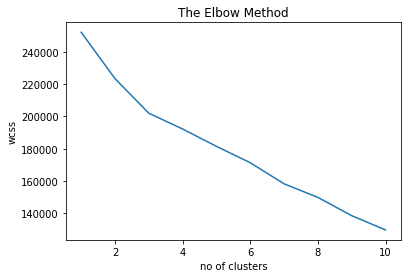

In [13]:
from sklearn.cluster import KMeans
wcss=[]

#Assuming that the max number of cluster would be 10
#you can judge the number of clusters by doing averaging
###Static code to get max no of clusters

for i in range(1,11):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show()

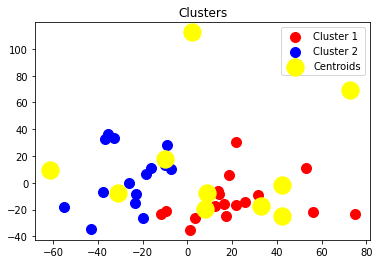

In [14]:
kmeansmodel = KMeans(n_clusters= 2, init='k-means++', random_state=0)
y_kmeans= kmeansmodel.fit_predict(X)

plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters')
plt.legend()
plt.show()

In [15]:
from sklearn.metrics import silhouette_samples, silhouette_score
silhouette_avg = silhouette_score(X, y_kmeans)
print("For 2 clusters, the average silhouette_score is :", silhouette_avg)

For 2 clusters, the average silhouette_score is : 0.09323411714058456


In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X_b, y, test_size=0.7, random_state=0)

train_random_forest = RandomForestClassifier(n_estimators = 2, random_state = 1)
train_random_forest.fit(X_train, y_train)
predictions_random_forest = train_random_forest.predict(X_test)

print("The accuracy for the decision tree classifier model is:", accuracy_score(y_test, predictions_random_forest) *100, '%')

The accuracy for the decision tree classifier model is: 62.96296296296296 %


In [17]:
#PCA With 15 components
pca = PCA(n_components=15)

In [18]:
#Preparing the data
X = pca.fit_transform(scaled_data)
df = pd.DataFrame(X)
X_b = pd.DataFrame(df.iloc[:38, :])

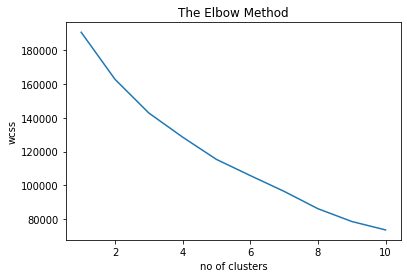

In [19]:
wcss=[]

for i in range(1,11):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show()

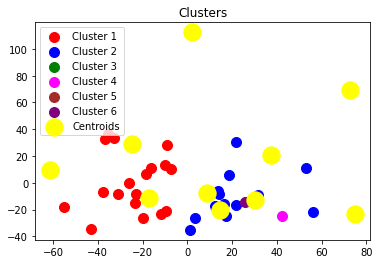

In [20]:
kmeansmodel = KMeans(n_clusters= 6, init='k-means++', random_state=0)
y_kmeans= kmeansmodel.fit_predict(X)

plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'magenta', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'brown', label = 'Cluster 5')
plt.scatter(X[y_kmeans == 5, 0], X[y_kmeans == 5, 1], s = 100, c = 'purple', label = 'Cluster 6')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters')
plt.legend()
plt.show()

In [21]:
silhouette_avg = silhouette_score(X, y_kmeans)
print("For 6 clusters, the average silhouette_score is :", silhouette_avg)

For 6 clusters, the average silhouette_score is : 0.16454508063800832


In [22]:
X_train, X_test, y_train, y_test = train_test_split(X_b, y, test_size=0.7, random_state=1)

train_random_forest = RandomForestClassifier(n_estimators = 2, random_state = 1)
train_random_forest.fit(X_train, y_train)
predictions_random_forest = train_random_forest.predict(X_test)

print("The accuracy for the decision tree classifier model is:", accuracy_score(y_test, predictions_random_forest) *100, '%')

The accuracy for the decision tree classifier model is: 66.66666666666666 %


In [23]:
#PCA with 5 components
pca = PCA(n_components=5)

In [24]:
#Preparing the data
X = pca.fit_transform(scaled_data)
df = pd.DataFrame(X)
X_b = pd.DataFrame(df.iloc[:38, :])

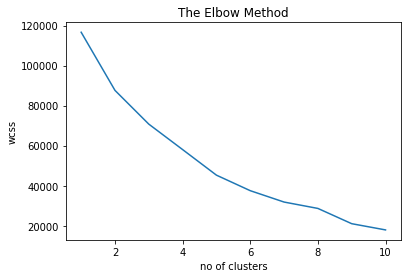

In [25]:
wcss=[]

for i in range(1,11):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show()

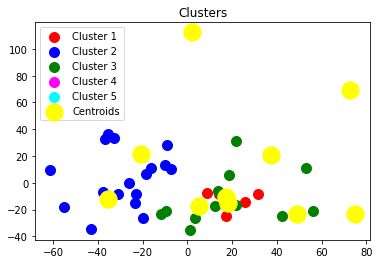

In [26]:
kmeansmodel = KMeans(n_clusters= 5, init='k-means++', random_state=0)
y_kmeans= kmeansmodel.fit_predict(X)

plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'magenta', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'cyan', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters')
plt.legend()
plt.show()

In [27]:
silhouette_avg = silhouette_score(X, y_kmeans)
print("For 5 clusters, the average silhouette_score is :", silhouette_avg)

For 5 clusters, the average silhouette_score is : 0.27291987844422666


In [28]:
X_train, X_test, y_train, y_test = train_test_split(X_b, y, test_size=0.7, random_state=1)

train_random_forest = RandomForestClassifier(n_estimators = 2, random_state = 1)
train_random_forest.fit(X_train, y_train)
predictions_random_forest = train_random_forest.predict(X_test)

print("The accuracy for the decision tree classifier model is:", accuracy_score(y_test, predictions_random_forest) *100, '%')

The accuracy for the decision tree classifier model is: 62.96296296296296 %


In [29]:
#PCA with 2 components
pca = PCA(n_components=2)

In [30]:
#Preparing the data
X = pca.fit_transform(scaled_data)
df = pd.DataFrame(X)
X_b = pd.DataFrame(df.iloc[:38, :])

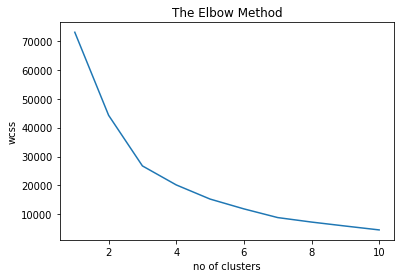

In [31]:
wcss=[]

for i in range(1,11):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show()

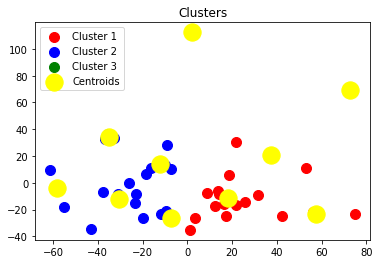

In [32]:
kmeansmodel = KMeans(n_clusters= 3, init='k-means++', random_state=0)
y_kmeans= kmeansmodel.fit_predict(X)

plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters')
plt.legend()
plt.show()

In [33]:
silhouette_avg = silhouette_score(X, y_kmeans)
print("For 2 clusters, the average silhouette_score is :", silhouette_avg)

For 2 clusters, the average silhouette_score is : 0.4285275543229478


In [34]:
X_train, X_test, y_train, y_test = train_test_split(X_b, y, test_size=0.7, random_state=1)

train_random_forest = RandomForestClassifier(n_estimators = 2, random_state = 1)
train_random_forest.fit(X_train, y_train)
predictions_random_forest = train_random_forest.predict(X_test)

print("The accuracy for the decision tree classifier model is:", accuracy_score(y_test, predictions_random_forest) *100, '%')

The accuracy for the decision tree classifier model is: 59.25925925925925 %
